In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("lab6.ipynb")

# Lab 6 - Discourse with Information
## Interactive & multi-view charts

The questions in each lab will be autograded, and all the autograded tests will give you immediate feedback directly in the notebook. This way you can quickly iterate and learn how to create your visualization during the lab time. After you upload your lab on gradescope, the same tests will run again and you will be able to see your score right away.

## Submission instructions

<div class="alert alert-info" style="color:black">
<ul>
  <li>Download this lab from the Jupyter Book web page by clicking the download symbol at the top right of the page and selecting the <code>.ipynb</code> format.</li>
  <li>To submit this lab, answer all the questions and then upload the completed lab to Gradescope.</li>
    <ul>
      <li>Before submitting, make sure you restart the kernel and rerun all cells (click the ▶▶ button).</li>
    </ul>
  <li>Don't change any variable names that are given to you, don't move cells around, and don't include any code to install packages in the notebook.</li>
  </li>
</ul>
</div>

## Loading in the data

In this lab we will be using the same data as in lab 3 and 5
to create interactive and multi-view visualizations.
In this cell we load in their fruits data and you can just follow along.

In [2]:
import pandas as pd

url = 'https://raw.githubusercontent.com/joelostblom/teaching-datasets/main/fruit-consumption-by-fruit-type.csv'
fruits = pd.read_csv(url, parse_dates=['Year'])

fruits = fruits.rename(
    columns=lambda x: x.split(' - ')[2] if '-' in x else x
).melt(
    id_vars=['Entity', 'Code', 'Year'],
    var_name='Fruit',
    value_name='KgPerCapita'
).query(
    # Dropping "Bananas" because a few countries consume such high amounts
    # that the axis scale makes it hard to see the amounts consumed of other fruits
    'Year == 2013 & Fruit not in  ["Bananas", "Grapefruit and products"]'
)

fruits

,Entity,Code,Year,Fruit,KgPerCapita
10392,Afghanistan,AFG,2013-01-01,Dates,0.02
10445,Africa,NaN,2013-01-01,Dates,2.69
10498,Albania,ALB,2013-01-01,Dates,3.80
10551,Algeria,DZA,2013-01-01,Dates,20.93
10604,Americas,NaN,2013-01-01,Dates,0.06
...,...,...,...,...,...
113496,Western Asia,NaN,2013-01-01,"Fruits, Other",27.73
113549,World,OWID_WRL,2013-01-01,"Fruits, Other",26.51
113602,Yemen,YEM,2013-01-01,"Fruits, Other",30.42
113686,Zambia,ZMB,2013-01-01,"Fruits, Other",7.59


In [3]:
# Run this cell to ensure that altair plots show up on gradescope
# We will talk more about what these lines do later in the course
import altair as alt

# Handle large data sets without embedding them in the notebook
alt.data_transformers.enable('data_server')
# Include an image for each plot since Gradescope only supports displaying plots as images
alt.renderers.enable('mimetype')

RendererRegistry.enable('mimetype')

## Question 1

<div class="alert alert-info" style="color:black">

Create a faceted histogram chart showing the <code>KgPerCapita</code> consumed in the world during 2013. Each facet should be for a different fruit type, the chart should have three columns, and each histograms height should be reduced to fit them all in the same view on the screen.
</div>

_Points:_ 8

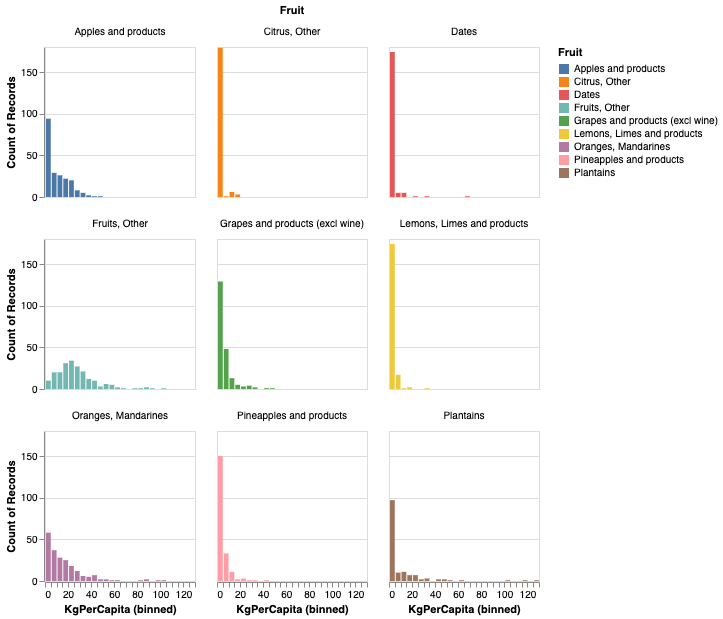

In [4]:
fruit_consumption_histograms = alt.Chart().mark_bar().encode(
  alt.X('KgPerCapita:Q', bin=alt.BinParams(maxbins=30)),
  alt.Y('count()'),
  alt.Color('Fruit:N')
).properties(
  width=150,
  height=150
).facet(
  data=fruits,
  facet='Fruit:N',
  columns=3
).transform_filter(
  'year(datum.Year) == "2013"'
)

# Show the chart
fruit_consumption_histograms

In [5]:
grader.check("q1")

q1 results: All test cases passed!

## Question 2

<div class="alert alert-info" style="color:black">
The code below reads in the data containing calories from different macronutrients. Using this data, create a faceted chart where each subplot shows a histogram of the calories consumed from one macronutrient. Use an appropriate number of columns to make the histogram easy to compare.
</div>

_Points:_ 8

In [6]:
# Given code to read in the data
url = 'https://raw.githubusercontent.com/joelostblom/teaching-datasets/main/daily-caloric-supply-derived-from-carbohydrates-protein-and-fat.csv'
calories_macros = pd.read_csv(
    url,
    parse_dates=['Year']
).rename(  # Extract key parts of column names
    columns=lambda x: '_'.join(x.split(' (')[0].split(' ')[2:]).capitalize() if ' ' in x else x
).rename(
    columns={'Entity': 'Country'}
).melt(  # Change to tidy format
    id_vars=['Country', 'Code', 'Year'],
    var_name='Macronutrient',
    value_name='Calories'
).query(
    'Year == 2013'
)
calories_macros

,Country,Code,Year,Macronutrient,Calories
52,Afghanistan,AFG,2013-01-01,Animal_protein,48.88
105,Albania,ALB,2013-01-01,Animal_protein,237.68
158,Algeria,DZA,2013-01-01,Animal_protein,99.96
211,Angola,AGO,2013-01-01,Animal_protein,73.60
264,Antigua and Barbuda,ATG,2013-01-01,Animal_protein,227.32
...,...,...,...,...,...
35680,Venezuela,VEN,2013-01-01,Carbohydrates,1596.55
35733,Vietnam,VNM,2013-01-01,Carbohydrates,1769.57
35786,Yemen,YEM,2013-01-01,Carbohydrates,1556.77
35870,Zambia,ZMB,2013-01-01,Carbohydrates,1330.67


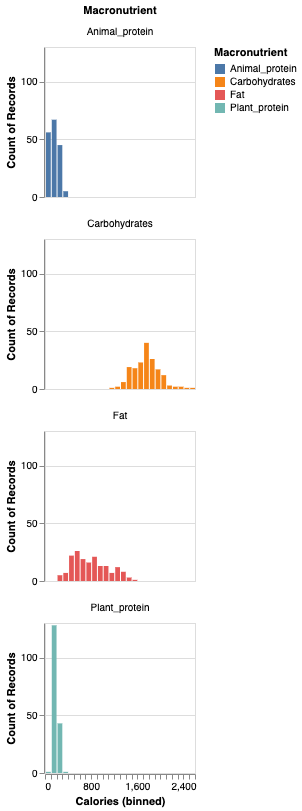

In [7]:
histograms_macronutrient_calories = alt.Chart().mark_bar().encode(
  alt.X('Calories:Q', bin=alt.BinParams(maxbins=40)),
  alt.Y('count()'),
  alt.Color('Macronutrient:N')
).properties(
  width=150,
  height=150
).facet(
  data=calories_macros,
  facet='Macronutrient:N',
  columns=1
)

# Show the chart
histograms_macronutrient_calories

In [8]:
grader.check("q2")

q2 results: All test cases passed!

## PART 2: Repeating charts and manual concatenation

## Question 3
<div class="alert alert-info" style="color:black">
    Use the data frame of calories per food group to create a chart showing the change over time in calorie consumption for the selected countries + a country of your choice. Repeat this chart for each food group in the dataframe in a grid that contains two columns of charts, and where each chart's height is 150. Make sure that all charts have the same y-max value so that we can easily compare the calories consumed via different products.</li>
</div>

_Points:_ 8

In [9]:
# Include a country of your choise as a string, e.g. 'Rwanda'
my_selected_country = "Rwanda"
# Given code to read in the data
included_countries = ["Canada", "United States", "India", "China", my_selected_country]
url = 'https://raw.githubusercontent.com/joelostblom/teaching-datasets/main/dietary-compositions-by-commodity-group.csv'
calories_food_groups = pd.read_csv(
    url,
    parse_dates=['Year']
).rename(
    columns=lambda x: x.split(' (')[0]
).rename(
    columns={'Entity': 'Country'}
).query(
    'Country in @included_countries'
)
calories_food_groups

,Country,Code,Year,Other,Sugar,Oils & Fats,Meat,Dairy & Eggs,Fruit and Vegetables,Starchy Roots,Pulses,Cereals and Grains,Alcoholic Beverages
1321,Canada,CAN,1961-01-01,26,471,542,317,412,157,132,23,628,99.0
1322,Canada,CAN,1962-01-01,24,496,558,316,398,162,132,18,637,102.0
1323,Canada,CAN,1963-01-01,22,481,574,322,398,156,131,21,692,102.0
1324,Canada,CAN,1964-01-01,21,469,567,337,391,157,129,28,591,105.0
1325,Canada,CAN,1965-01-01,25,486,572,334,388,160,125,26,703,105.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7756,United States,USA,2009-01-01,28,564,862,467,431,191,93,40,805,164.0
7757,United States,USA,2010-01-01,32,570,870,469,425,181,91,38,807,167.0
7758,United States,USA,2011-01-01,31,589,895,461,417,181,93,30,794,158.0
7759,United States,USA,2012-01-01,27,597,899,457,426,186,99,36,799,161.0


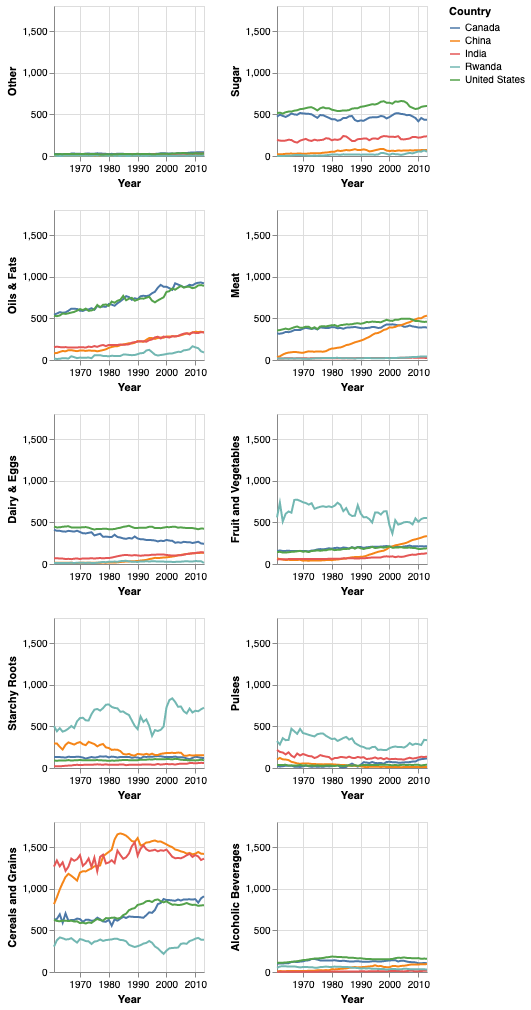

In [10]:
lines_calories_per_commodity = alt.Chart(calories_food_groups).mark_line().encode(
  alt.X('Year:T'),
  alt.Y(alt.repeat('repeat'), type='quantitative'),
  alt.Color('Country:N')
).properties(
  width=150,
  height=150
).repeat(
    repeat=['Other', 'Sugar', 'Oils & Fats', 'Meat', 'Dairy & Eggs',
         'Fruit and Vegetables', 'Starchy Roots', 'Pulses', 
         'Cereals and Grains', 'Alcoholic Beverages'],
    columns=2
).resolve_scale(
    y='shared'
)

lines_calories_per_commodity

In [11]:
grader.check("q3")

q3 results: All test cases passed!

## Question 4

<div class="alert alert-info" style="color:black">
To get a more concise view of the caloric consumption from all food groups in a single year, we can create a heatmap. Let the color represent the calories consumed and map the countries to the x-axis and each food group to the y-axis (we have already performed the required data frame reshaping)
</div>

_Points:_ 8

In [12]:
# Given code to reshape the data
calories_food_groups_tidy = calories_food_groups.melt(
    id_vars=['Country', 'Code', 'Year'],
    var_name='Food_group',
    value_name='Calories'
).query(
    'Year == 2013'
)
calories_food_groups_tidy

,Country,Code,Year,Food_group,Calories
52,Canada,CAN,2013-01-01,Other,45.0
105,China,CHN,2013-01-01,Other,25.0
158,India,IND,2013-01-01,Other,27.0
211,Rwanda,RWA,2013-01-01,Other,8.0
264,United States,USA,2013-01-01,Other,30.0
317,Canada,CAN,2013-01-01,Sugar,434.0
370,China,CHN,2013-01-01,Sugar,71.0
423,India,IND,2013-01-01,Sugar,236.0
476,Rwanda,RWA,2013-01-01,Sugar,51.0
529,United States,USA,2013-01-01,Sugar,600.0


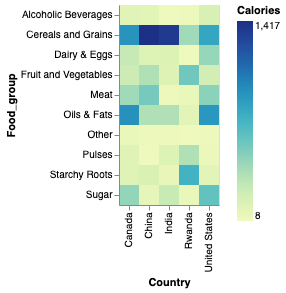

In [13]:
heatmap_food_groups = alt.Chart(calories_food_groups_tidy).mark_rect().encode(
    alt.X('Country:N'),
    alt.Y('Food_group:N'),
    alt.Color('Calories:Q')
)

heatmap_food_groups

In [14]:
grader.check("q4")

q4 results: All test cases passed!

## Question 5

<div class="alert alert-info" style="color:black">
Let's present the previous heatmap together with a heatmap for the macronutrient calories. Use the same dataframe as in the previous question for the macronutrient calories and create a heatmap the same way you just did for the food group calories. Lay these two heatmaps out in the same chart by concatenating them horizontally with the macronutrient heatmap to the left.
</div>

_Points:_ 10

In [15]:
calories_macros

,Country,Code,Year,Macronutrient,Calories
52,Afghanistan,AFG,2013-01-01,Animal_protein,48.88
105,Albania,ALB,2013-01-01,Animal_protein,237.68
158,Algeria,DZA,2013-01-01,Animal_protein,99.96
211,Angola,AGO,2013-01-01,Animal_protein,73.60
264,Antigua and Barbuda,ATG,2013-01-01,Animal_protein,227.32
...,...,...,...,...,...
35680,Venezuela,VEN,2013-01-01,Carbohydrates,1596.55
35733,Vietnam,VNM,2013-01-01,Carbohydrates,1769.57
35786,Yemen,YEM,2013-01-01,Carbohydrates,1556.77
35870,Zambia,ZMB,2013-01-01,Carbohydrates,1330.67


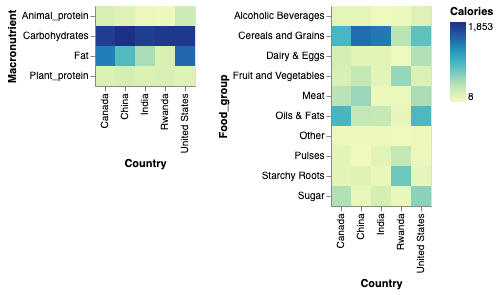

In [16]:
# Code is given for how to filter the dataframe
unique_countries = calories_food_groups["Country"].unique()
heatmap_macros = alt.Chart(calories_macros.query('Country in @unique_countries')).mark_rect().encode(
    alt.X('Country:N'),
    alt.Y('Macronutrient:N'),
    alt.Color('Calories:Q')
)
side_by_side_heatmaps = heatmap_macros | heatmap_food_groups 
# Show the charts
side_by_side_heatmaps

In [17]:
grader.check("q5")

q5 results: All test cases passed!

## PART 3: LINKING MULTIPLE VIEWS

## Question 6

<div class="alert alert-info" style="color:black">

We are reading in the data of macronutrient calories again, but this time keeping all the years instead of filtering for only 2013, and limiting to Canada, India and China.
Let's create the bar chart in the dashboard by plotting the average number of calories consumes from each macronutrient over all the years.</li>
    <ul>
        <li>Facet the chart in a single column, where each facet represents a macronutrient and each y-position and color should represent the countries.</li>
        <li>Set the max values of the x scale to 2,000 (this will be useful in task 3 for the bar's x-axis to remain constant when selecting in the line chart).</li>
        <li>Create a multi selection so that when the legend is clicked, the opacity of the bars changes to highlight the country that was clicked in the legend.</li>
    </ul>
</div>

_Points:_ 15

In [18]:
# Given code to read in the data
url = 'https://raw.githubusercontent.com/joelostblom/teaching-datasets/main/daily-caloric-supply-derived-from-carbohydrates-protein-and-fat.csv'
included_countries = ["Canada", "India", "China"]
calories_macros = pd.read_csv(
    url,
    parse_dates=['Year']
).rename(
    columns=lambda x: '_'.join(x.split(' (')[0].split(' ')[2:]).capitalize() if ' ' in x else x
).rename(
    columns={'Entity': 'Country'}
).melt(
    id_vars=['Country', 'Code', 'Year'],
    var_name='Macronutrient',
    value_name='Calories'
).query(
    'Country in @included_countries'
)
calories_macros

,Country,Code,Year,Macronutrient,Calories
1453,Canada,CAN,1961-01-01,Animal_protein,233.28
1454,Canada,CAN,1962-01-01,Animal_protein,228.80
1455,Canada,CAN,1963-01-01,Animal_protein,231.20
1456,Canada,CAN,1964-01-01,Animal_protein,235.80
1457,Canada,CAN,1965-01-01,Animal_protein,234.20
...,...,...,...,...,...
30692,India,IND,2009-01-01,Carbohydrates,1715.20
30693,India,IND,2010-01-01,Carbohydrates,1741.13
30694,India,IND,2011-01-01,Carbohydrates,1746.07
30695,India,IND,2012-01-01,Carbohydrates,1724.61


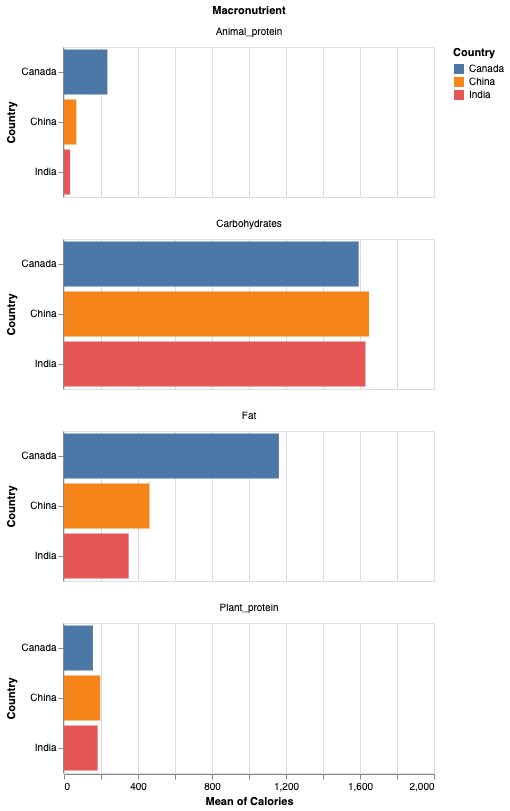

In [19]:
click = alt.selection_multi(
    fields=['Country'],
    bind='legend'
)

bar_macros = alt.Chart().mark_bar().encode(
  alt.X('mean(Calories):Q', scale=alt.Scale(domain=[0, 2000])),
  alt.Y('Country:O'),
  alt.Color('Country:N'),
  opacity=alt.condition(click, alt.value(1), alt.value(0.2))
).properties(
  width=370,
  height=150
).facet(
  data=calories_macros,
  facet='Macronutrient:N',
  columns=1
).add_selection(
  click
)
    
# Show the chart
bar_macros

In [20]:
grader.check("q6")

q6 results: All test cases passed!

## Question 7

<div class="alert alert-info" style="color:black">
To create the second chart of the dashboard, we will use the same macronutrient calorie data and create a line chart where the x-axis is the year and the y-axis shows the calories consumed.</li>
    <ul>
        <li>The color should represent the countries and the <code>strokeDash</code> should indicate which type of macronutrient is visualized.</li>
        <li>Set the line size to 3 so that it is easy to see the different stroke types.</li>
        <li>Set the height of this chart to 370 and create a title describing what is visualized.</li>
        <li>An on-click interaction such that, when the attribute value is clicked in the legend, the opacity of the other lines changes to 0.2 (from 1) </li>
    </ul>
</div>

_Points:_ 15

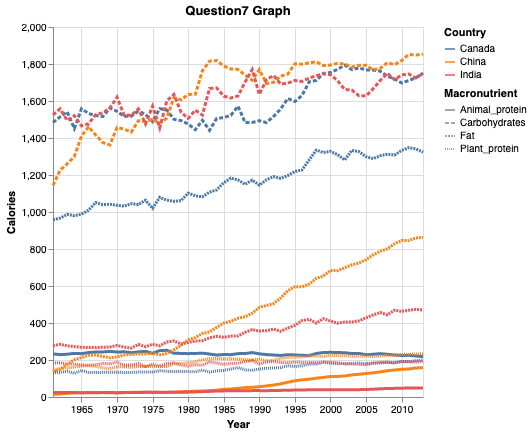

In [21]:
line_macros = alt.Chart(calories_macros).mark_line(
  size=3
).encode(
  alt.X('Year:T'),
  alt.Y('Calories:Q'),
  alt.Color('Country:N'),
  strokeDash='Macronutrient:N',
  opacity=alt.condition(click, alt.value(1), alt.value(0.2))
).properties(
  width=370,
  height=370,
  title="Question7 Graph"
).add_selection(
  click
)

# Show the chart
line_macros

In [22]:
grader.check("q7")

q7 results: All test cases passed!

## Question 8

<div class="alert alert-info" style="color:black">

Now let's link the charts together! Create a horizontally concatenated with the bar plot to the left and the line plot to the right. Add an interval selection to the line chart that controls which data is used in the bar chart, so that selection a range of years in the line chart changes the length of the bars in the bar chart.
</div>

_Points:_ 10

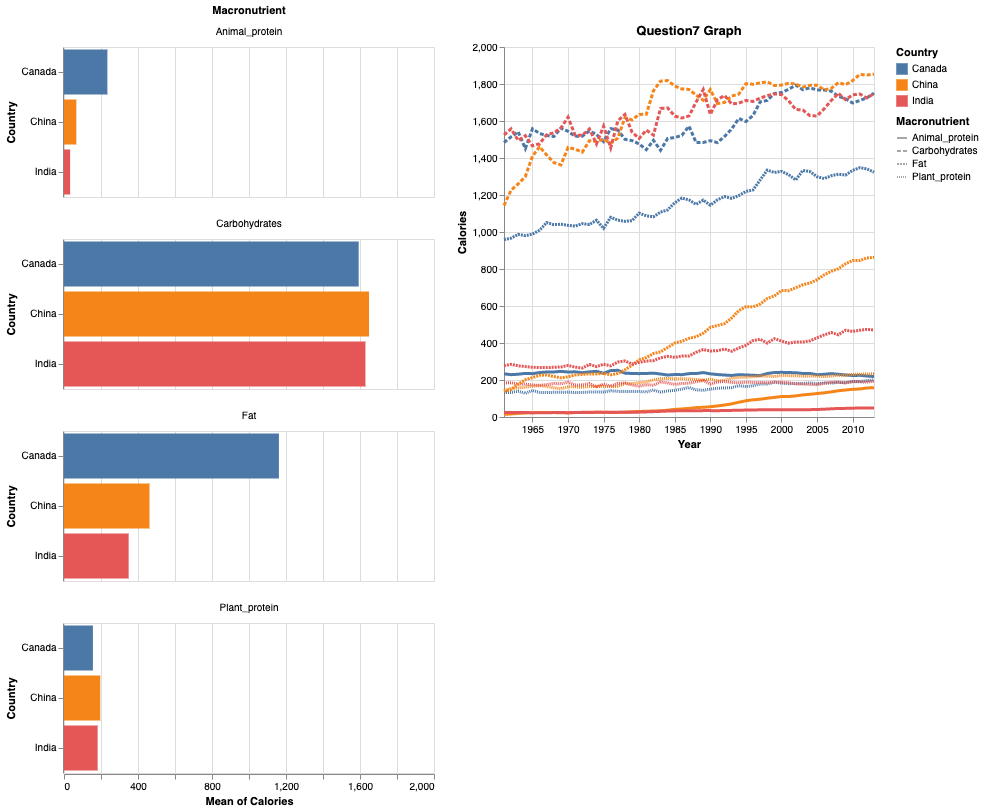

In [23]:

selection = alt.selection_interval(encodings=['x'])

mini_dashboard = alt.hconcat(bar_macros.transform_filter(selection), line_macros.add_selection(selection))
# Show the chart
mini_dashboard

In [24]:
grader.check("q8")

q8 results: All test cases passed!

<div class="alert alert-danger" style="color:black">
    
**Restart and run all before submitting**
    
Before submitting,
don't forget to run all cells in your notebook
to make sure there are no errors.
You can do this by clicking the ▶▶ button
or going to `Kernel -> Restart Kernel and Run All Cells...` in the menu.
This is not only important for this course,
but a good habit you should get into before ever committing a notebook to GitHub,
so that your collaborators can run it from top to bottom
without issues.
</div>